In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train_data.csv',index_col="調査日",parse_dates=True)
df1 = pd.read_csv('data/train_data_1mon.csv',index_col="調査日",parse_dates=True)
df2 = pd.read_csv('data/train_data_2mon.csv',index_col="調査日",parse_dates=True)
df3 = pd.read_csv('data/train_data_3mon.csv',index_col="調査日",parse_dates=True)
df = df.resample("W-MON").last()
df1 = df1.resample("W-MON").last()
df2 = df2.resample("W-MON").last()
df3 = df3.resample("W-MON").last()

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [5]:
import statsmodels.api as sm 

1ヶ月前

In [6]:
df1

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2017-01-30,202,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-02-06,211,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-02-13,211,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-02-20,227,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-02-27,219,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...,...
2022-02-07,170,5.628571,0.000000,7.142857,5.900000,1.928571,6.414286,-4.785714,0.285714,6.028571
2022-02-14,193,5.428571,1.571429,5.300000,6.128571,3.285714,7.042857,-4.942857,2.142857,2.314286
2022-02-21,192,4.142857,1.357143,5.671429,4.814286,0.571429,7.085714,-6.928571,0.428571,4.271429


In [7]:
train = df1[:-24]
test = df1[-24:]

In [8]:
len(train)

243

In [9]:
train.head()

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2017-01-30,202,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-02-06,211,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-02-13,211,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-02-20,227,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-02-27,219,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714


In [10]:
len(test)

24

In [11]:
y = train["キャベツ"]
X = train[train.columns[train.columns != "キャベツ"]]

In [12]:
y

調査日
2017-01-30    202
2017-02-06    211
2017-02-13    211
2017-02-20    227
2017-02-27    219
             ... 
2021-08-23    155
2021-08-30    161
2021-09-06    159
2021-09-13    188
2021-09-20    204
Freq: W-MON, Name: キャベツ, Length: 243, dtype: int64

In [13]:
X

,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,
2017-01-30,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-02-06,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-02-13,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-02-20,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-02-27,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...
2021-08-23,27.600000,0.000000,10.885714,26.342857,0.857143,10.942857,20.900000,1.714286,8.414286
2021-08-30,28.642857,0.000000,8.714286,26.185714,3.571429,8.714286,19.928571,3.000000,3.685714
2021-09-06,28.585714,12.928571,7.628571,27.485714,21.000000,9.457143,21.642857,0.642857,4.742857


コード参考:https://www.lifull.blog/entry/2019/12/25/151030

In [29]:
import itertools

p = q = range(0, 3)
sp = sd = sq = range(0, 2)

pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(sp, sd, sq))]

In [30]:
import warnings
warnings.filterwarnings("ignore")

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(y,X, order = param, seasonal_order = param_seasonal,freq="W-MON")
            results = mod.fit()
            print('ARIMAパラメータ{}, 季節変動パラメータ{} - AIC: {}'.format(param, param_seasonal, results.aic))
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue

print('AIC最小のモデル：', best_result)

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52335D+00    |proj g|=  3.56152D-03

At iterate    5    f=  4.28606D+00    |proj g|=  2.06761D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5     20      1     0     0   2.068D-05   4.286D+00
  F =   4.2860631262383926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00

 This problem is unconstrained.



At iterate    0    f=  5.31766D+00    |proj g|=  2.17495D-03
  ys=-2.856E+00  -gs= 6.935E-01 BFGS update SKIPPED

At iterate    5    f=  3.65654D+00    |proj g|=  2.87798D-03

At iterate   10    f=  3.65524D+00    |proj g|=  2.62255D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     11     27      2     1     0   2.638D-06   3.655D+00
  F =   3.6552422985952906     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMA

 This problem is unconstrained.



At iterate    0    f=  3.68050D+00    |proj g|=  4.38973D-01

At iterate    5    f=  3.52325D+00    |proj g|=  1.35088D-02

At iterate   10    f=  3.51328D+00    |proj g|=  5.74674D-03

At iterate   15    f=  3.51119D+00    |proj g|=  1.08207D-03

At iterate   20    f=  3.51094D+00    |proj g|=  2.65563D-04

At iterate   25    f=  3.51089D+00    |proj g|=  1.27795D-03

At iterate   30    f=  3.51085D+00    |proj g|=  6.05427D-04

At iterate   35    f=  3.51083D+00    |proj g|=  7.49843D-04

At iterate   40    f=  3.51081D+00    |proj g|=  2.08138D-04

At iterate   45    f=  3.51080D+00    |proj g|=  6.51406D-05

At iterate   50    f=  3.51080D+00    |proj g|=  7.34448D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.28614D+00    |proj g|=  1.23602D-03

At iterate    5    f=  4.28603D+00    |proj g|=  1.14875D-03

At iterate   10    f=  4.28602D+00    |proj g|=  2.29502D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     11     13      1     0     0   1.198D-05   4.286D+00
  F =   4.2860207456566748     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2105.0

 This problem is unconstrained.



At iterate    0    f=  4.54002D+00    |proj g|=  6.68808D-01

At iterate    5    f=  4.32182D+00    |proj g|=  1.46059D-01

At iterate   10    f=  4.28609D+00    |proj g|=  6.56475D-03

At iterate   15    f=  4.28604D+00    |proj g|=  3.93228D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     18     21      1     0     0   4.122D-05   4.286D+00
  F =   4.2860414226529713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.56814D+00    |proj g|=  9.99967D-02

At iterate    5    f=  3.55387D+00    |proj g|=  1.26887D-02

At iterate   10    f=  3.54787D+00    |proj g|=  2.37485D-03

At iterate   15    f=  3.54750D+00    |proj g|=  1.60056D-03

At iterate   20    f=  3.54738D+00    |proj g|=  4.56568D-04

At iterate   25    f=  3.54735D+00    |proj g|=  6.45706D-05

At iterate   30    f=  3.54735D+00    |proj g|=  5.25649D-05

At iterate   35    f=  3.54734D+00    |proj g|=  1.02935D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     38     43      1     0     0   5.979D-06   3.547D+00
  F =   3.54734442390

 This problem is unconstrained.



At iterate    0    f=  3.57823D+00    |proj g|=  6.25675D-02

At iterate    5    f=  3.51342D+00    |proj g|=  1.08510D-02

At iterate   10    f=  3.51137D+00    |proj g|=  2.29064D-03

At iterate   15    f=  3.50992D+00    |proj g|=  1.24187D-03

At iterate   20    f=  3.50965D+00    |proj g|=  1.42625D-03

At iterate   25    f=  3.50954D+00    |proj g|=  3.15880D-04

At iterate   30    f=  3.50951D+00    |proj g|=  1.65487D-03

At iterate   35    f=  3.50948D+00    |proj g|=  5.52568D-04

At iterate   40    f=  3.50946D+00    |proj g|=  1.86851D-04

At iterate   45    f=  3.50945D+00    |proj g|=  2.17892D-04

At iterate   50    f=  3.50943D+00    |proj g|=  2.81780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.09604D+00    |proj g|=  1.40981D-03

At iterate   30    f=  4.09602D+00    |proj g|=  8.86815D-05

At iterate   35    f=  4.09602D+00    |proj g|=  2.86450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     39     44      1     0     0   4.323D-05   4.096D+00
  F =   4.0960206669011310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 1), 季節変動パラメータ(0, 0, 0, 52) - AIC: 2012.6

 This problem is unconstrained.



At iterate    0    f=  4.26964D+00    |proj g|=  2.43890D-01

At iterate    5    f=  4.11257D+00    |proj g|=  9.56383D-03

At iterate   10    f=  4.10268D+00    |proj g|=  1.47224D-02

At iterate   15    f=  4.09698D+00    |proj g|=  6.82691D-03

At iterate   20    f=  4.09625D+00    |proj g|=  1.51533D-03

At iterate   25    f=  4.09608D+00    |proj g|=  1.89484D-03

At iterate   30    f=  4.09603D+00    |proj g|=  2.02840D-03

At iterate   35    f=  4.09602D+00    |proj g|=  1.03072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     38     42      1     0     0   1.011D-05   4.096D+00
  F =   4.09601931229

 This problem is unconstrained.



At iterate    0    f=  3.52963D+00    |proj g|=  7.26067D-02

At iterate    5    f=  3.51174D+00    |proj g|=  1.11209D-02

At iterate   10    f=  3.50217D+00    |proj g|=  6.36780D-03

At iterate   15    f=  3.49910D+00    |proj g|=  1.17480D-03

At iterate   20    f=  3.49888D+00    |proj g|=  8.37227D-04

At iterate   25    f=  3.49882D+00    |proj g|=  1.37183D-04

At iterate   30    f=  3.49882D+00    |proj g|=  9.56288D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     31     33      1     0     0   1.531D-04   3.499D+00
  F =   3.4988165599631258     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  3.52963D+00    |proj g|=  2.92985D-01

At iterate    5    f=  3.42758D+00    |proj g|=  1.38197D-02

At iterate   10    f=  3.38376D+00    |proj g|=  1.14696D-02

At iterate   15    f=  3.36762D+00    |proj g|=  4.07138D-03

At iterate   20    f=  3.36652D+00    |proj g|=  3.87051D-03

At iterate   25    f=  3.36615D+00    |proj g|=  5.99290D-03

At iterate   30    f=  3.36604D+00    |proj g|=  1.03278D-03

At iterate   35    f=  3.36598D+00    |proj g|=  8.44554D-04

At iterate   40    f=  3.36585D+00    |proj g|=  9.63637D-04

At iterate   45    f=  3.36577D+00    |proj g|=  3.99688D-04

At iterate   50    f=  3.36575D+00    |proj g|=  1.99054D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.12849D+00    |proj g|=  1.10125D-01

At iterate    5    f=  4.11215D+00    |proj g|=  1.58309D-02

At iterate   10    f=  4.10008D+00    |proj g|=  9.54844D-03

At iterate   15    f=  4.09686D+00    |proj g|=  8.23361D-03

At iterate   20    f=  4.09621D+00    |proj g|=  1.39402D-03

At iterate   25    f=  4.09607D+00    |proj g|=  2.05428D-03

At iterate   30    f=  4.09602D+00    |proj g|=  1.06252D-04

At iterate   35    f=  4.09602D+00    |proj g|=  7.36375D-05

At iterate   40    f=  4.09602D+00    |proj g|=  6.47861D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     41     46   

 This problem is unconstrained.



At iterate    0    f=  4.25023D+00    |proj g|=  4.28660D-01

At iterate    5    f=  4.11244D+00    |proj g|=  1.54079D-02

At iterate   10    f=  4.09914D+00    |proj g|=  7.22366D-03

At iterate   15    f=  4.09633D+00    |proj g|=  5.21703D-03

At iterate   20    f=  4.09615D+00    |proj g|=  5.10536D-03

At iterate   25    f=  4.09603D+00    |proj g|=  1.36406D-03

At iterate   30    f=  4.09602D+00    |proj g|=  1.43742D-04

At iterate   35    f=  4.09602D+00    |proj g|=  1.95832D-04

At iterate   40    f=  4.09602D+00    |proj g|=  6.25230D-05

At iterate   45    f=  4.09602D+00    |proj g|=  2.41973D-04

At iterate   50    f=  4.09601D+00    |proj g|=  1.19868D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.45469D+00    |proj g|=  7.38100D-02

At iterate    5    f=  3.43626D+00    |proj g|=  1.67390D-02

At iterate   10    f=  3.41266D+00    |proj g|=  8.00843D-03

At iterate   15    f=  3.40685D+00    |proj g|=  7.32024D-03

At iterate   20    f=  3.40664D+00    |proj g|=  1.64164D-03

At iterate   25    f=  3.40648D+00    |proj g|=  6.85976D-04

At iterate   30    f=  3.40646D+00    |proj g|=  5.00098D-05

At iterate   35    f=  3.40646D+00    |proj g|=  2.97444D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     36     40      1     0     0   8.160D-06   3.406D+00
  F =   3.40646185595

 This problem is unconstrained.



At iterate    0    f=  3.48274D+00    |proj g|=  8.83458D-02

At iterate    5    f=  3.42646D+00    |proj g|=  3.01505D-02

At iterate   10    f=  3.40765D+00    |proj g|=  4.77526D-02

At iterate   15    f=  3.37667D+00    |proj g|=  1.84951D-02

At iterate   20    f=  3.36686D+00    |proj g|=  7.20850D-03

At iterate   25    f=  3.36538D+00    |proj g|=  3.10330D-03

At iterate   30    f=  3.36500D+00    |proj g|=  1.05428D-03

At iterate   35    f=  3.36488D+00    |proj g|=  4.83049D-04

At iterate   40    f=  3.36484D+00    |proj g|=  7.48588D-04

At iterate   45    f=  3.36483D+00    |proj g|=  6.27133D-04

At iterate   50    f=  3.36482D+00    |proj g|=  5.82467D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.06214D+00    |proj g|=  9.25713D-04

At iterate   30    f=  4.06207D+00    |proj g|=  1.76208D-03

At iterate   35    f=  4.06205D+00    |proj g|=  1.18944D-03

At iterate   40    f=  4.06204D+00    |proj g|=  2.91824D-04

At iterate   45    f=  4.06204D+00    |proj g|=  9.73691D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     48     54      1     0     0   9.947D-05   4.062D+00
  F =   4.0620419912109176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  4.24420D+00    |proj g|=  2.60686D-01

At iterate    5    f=  4.07890D+00    |proj g|=  1.33898D-02

At iterate   10    f=  4.07131D+00    |proj g|=  1.19491D-02

At iterate   15    f=  4.06418D+00    |proj g|=  1.83016D-02

At iterate   20    f=  4.06240D+00    |proj g|=  1.77277D-03

At iterate   25    f=  4.06202D+00    |proj g|=  1.02962D-03

At iterate   30    f=  4.06193D+00    |proj g|=  7.65026D-04

At iterate   35    f=  4.06192D+00    |proj g|=  6.45172D-04

At iterate   40    f=  4.06192D+00    |proj g|=  3.43023D-04

At iterate   45    f=  4.06192D+00    |proj g|=  2.13178D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.50448D+00    |proj g|=  5.26499D-02

At iterate    5    f=  3.48702D+00    |proj g|=  9.49618D-03

At iterate   10    f=  3.47517D+00    |proj g|=  5.85382D-03

At iterate   15    f=  3.47106D+00    |proj g|=  2.63613D-03

At iterate   20    f=  3.47074D+00    |proj g|=  2.84666D-03

At iterate   25    f=  3.47047D+00    |proj g|=  1.46946D-03

At iterate   30    f=  3.47040D+00    |proj g|=  2.42557D-04

At iterate   35    f=  3.47040D+00    |proj g|=  6.70474D-05

At iterate   40    f=  3.47040D+00    |proj g|=  1.06167D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     42     46   

 This problem is unconstrained.



At iterate    0    f=  3.50448D+00    |proj g|=  3.23656D-01

At iterate    5    f=  3.39968D+00    |proj g|=  1.08118D-02

At iterate   10    f=  3.36960D+00    |proj g|=  2.45174D-02

At iterate   15    f=  3.34925D+00    |proj g|=  2.74578D-02

At iterate   20    f=  3.34418D+00    |proj g|=  3.53163D-03

At iterate   25    f=  3.34373D+00    |proj g|=  5.01219D-03

At iterate   30    f=  3.34359D+00    |proj g|=  5.69893D-04

At iterate   35    f=  3.34350D+00    |proj g|=  1.53596D-03

At iterate   40    f=  3.34342D+00    |proj g|=  9.67628D-04

At iterate   45    f=  3.34339D+00    |proj g|=  6.98868D-04

At iterate   50    f=  3.34337D+00    |proj g|=  5.32752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.08828D+00    |proj g|=  4.00220D-02

At iterate    5    f=  4.07694D+00    |proj g|=  1.62111D-02

At iterate   10    f=  4.06828D+00    |proj g|=  1.99188D-02

At iterate   15    f=  4.06435D+00    |proj g|=  3.30672D-02

At iterate   20    f=  4.06236D+00    |proj g|=  3.13106D-03

At iterate   25    f=  4.06203D+00    |proj g|=  1.71983D-03

At iterate   30    f=  4.06196D+00    |proj g|=  1.55911D-03

At iterate   35    f=  4.06193D+00    |proj g|=  3.16438D-04

At iterate   40    f=  4.06193D+00    |proj g|=  1.69425D-04

At iterate   45    f=  4.06193D+00    |proj g|=  1.10223D-04

At iterate   50    f=  4.06193D+00    |proj g|=  5.59903D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.22240D+00    |proj g|=  4.48436D-01

At iterate    5    f=  4.07745D+00    |proj g|=  2.27968D-02

At iterate   10    f=  4.07003D+00    |proj g|=  4.78386D-02

At iterate   15    f=  4.06501D+00    |proj g|=  2.41570D-02

At iterate   20    f=  4.06247D+00    |proj g|=  3.88770D-03

At iterate   25    f=  4.06212D+00    |proj g|=  4.42051D-03

At iterate   30    f=  4.06202D+00    |proj g|=  1.58977D-03

At iterate   35    f=  4.06195D+00    |proj g|=  3.90358D-04

At iterate   40    f=  4.06194D+00    |proj g|=  1.20004D-03

At iterate   45    f=  4.06194D+00    |proj g|=  3.34499D-04

At iterate   50    f=  4.06193D+00    |proj g|=  4.76411D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.41837D+00    |proj g|=  2.20596D-02

At iterate    5    f=  3.40469D+00    |proj g|=  1.24343D-02

At iterate   10    f=  3.38997D+00    |proj g|=  2.76779D-02

At iterate   15    f=  3.38188D+00    |proj g|=  1.19667D-02

At iterate   20    f=  3.38089D+00    |proj g|=  6.25907D-03

At iterate   25    f=  3.38071D+00    |proj g|=  2.28048D-03

At iterate   30    f=  3.38064D+00    |proj g|=  1.96587D-04

At iterate   35    f=  3.38064D+00    |proj g|=  9.56995D-05

At iterate   40    f=  3.38064D+00    |proj g|=  4.32425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     44     47   

 This problem is unconstrained.



At iterate    0    f=  3.44326D+00    |proj g|=  8.54477D-02

At iterate    5    f=  3.39748D+00    |proj g|=  2.60874D-02

At iterate   10    f=  3.38240D+00    |proj g|=  5.11786D-02

At iterate   15    f=  3.35491D+00    |proj g|=  3.57560D-02

At iterate   20    f=  3.34388D+00    |proj g|=  5.50528D-03

At iterate   25    f=  3.34317D+00    |proj g|=  2.92076D-03

At iterate   30    f=  3.34234D+00    |proj g|=  1.29426D-03

At iterate   35    f=  3.34226D+00    |proj g|=  1.13249D-03

At iterate   40    f=  3.34223D+00    |proj g|=  9.06017D-04

At iterate   45    f=  3.34220D+00    |proj g|=  1.01595D-03

At iterate   50    f=  3.34214D+00    |proj g|=  4.30792D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.09063D+00    |proj g|=  1.70219D-04

At iterate   30    f=  4.09063D+00    |proj g|=  5.20795D-05

At iterate   35    f=  4.09063D+00    |proj g|=  4.87696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35     40      1     0     0   4.877D-05   4.091D+00
  F =   4.0906306183775998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 0), 季節変動パラメータ(0, 0, 0, 52) - AIC: 2010.0

 This problem is unconstrained.



At iterate    0    f=  4.27420D+00    |proj g|=  2.80106D-01

At iterate    5    f=  4.10189D+00    |proj g|=  1.04344D-02

At iterate   10    f=  4.09607D+00    |proj g|=  1.14199D-02

At iterate   15    f=  4.09169D+00    |proj g|=  9.72146D-03

At iterate   20    f=  4.09056D+00    |proj g|=  6.94843D-03

At iterate   25    f=  4.09042D+00    |proj g|=  1.34593D-03

At iterate   30    f=  4.09037D+00    |proj g|=  1.74378D-03

At iterate   35    f=  4.09036D+00    |proj g|=  2.29892D-04

At iterate   40    f=  4.09036D+00    |proj g|=  2.67680D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     43     46   

 This problem is unconstrained.



At iterate    0    f=  3.52289D+00    |proj g|=  2.93356D-02

At iterate    5    f=  3.51368D+00    |proj g|=  1.13182D-02

At iterate   10    f=  3.50801D+00    |proj g|=  4.16279D-03

At iterate   15    f=  3.50694D+00    |proj g|=  8.68451D-04

At iterate   20    f=  3.50681D+00    |proj g|=  7.30412D-04

At iterate   25    f=  3.50680D+00    |proj g|=  3.54486D-04

At iterate   30    f=  3.50680D+00    |proj g|=  8.24742D-05

At iterate   35    f=  3.50680D+00    |proj g|=  1.83533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     36     44      1     0     0   1.956D-05   3.507D+00
  F =   3.50679701988

 This problem is unconstrained.



At iterate    0    f=  3.52289D+00    |proj g|=  3.11152D-01

At iterate    5    f=  3.42453D+00    |proj g|=  1.37002D-02

At iterate   10    f=  3.37692D+00    |proj g|=  1.17595D-02

At iterate   15    f=  3.36678D+00    |proj g|=  3.66857D-03

At iterate   20    f=  3.36603D+00    |proj g|=  4.15433D-03

At iterate   25    f=  3.36531D+00    |proj g|=  1.52963D-03

At iterate   30    f=  3.36523D+00    |proj g|=  5.10756D-04

At iterate   35    f=  3.36511D+00    |proj g|=  1.50971D-03

At iterate   40    f=  3.36508D+00    |proj g|=  1.42710D-03

At iterate   45    f=  3.36505D+00    |proj g|=  8.70183D-04

At iterate   50    f=  3.36502D+00    |proj g|=  3.89197D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.10640D+00    |proj g|=  3.43544D-02

At iterate    5    f=  4.09922D+00    |proj g|=  8.70617D-03

At iterate   10    f=  4.09251D+00    |proj g|=  4.98216D-03

At iterate   15    f=  4.09063D+00    |proj g|=  1.34156D-03

At iterate   20    f=  4.09045D+00    |proj g|=  3.65124D-03

At iterate   25    f=  4.09039D+00    |proj g|=  2.45262D-03

At iterate   30    f=  4.09035D+00    |proj g|=  1.61880D-04

At iterate   35    f=  4.09035D+00    |proj g|=  1.10546D-04

At iterate   40    f=  4.09035D+00    |proj g|=  3.24999D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     40     45   

 This problem is unconstrained.



At iterate    0    f=  4.25047D+00    |proj g|=  4.80448D-01

At iterate    5    f=  4.10040D+00    |proj g|=  1.02606D-02

At iterate   10    f=  4.09356D+00    |proj g|=  3.03056D-02

At iterate   15    f=  4.09074D+00    |proj g|=  7.08725D-03

At iterate   20    f=  4.09047D+00    |proj g|=  3.81189D-03

At iterate   25    f=  4.09039D+00    |proj g|=  7.65877D-04

At iterate   30    f=  4.09034D+00    |proj g|=  1.10865D-03

At iterate   35    f=  4.09034D+00    |proj g|=  2.37168D-04

At iterate   40    f=  4.09034D+00    |proj g|=  1.13808D-04

At iterate   45    f=  4.09034D+00    |proj g|=  9.71435D-05

At iterate   50    f=  4.09034D+00    |proj g|=  1.31345D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.44109D+00    |proj g|=  1.44649D-02

At iterate    5    f=  3.42560D+00    |proj g|=  2.17338D-02

At iterate   10    f=  3.40383D+00    |proj g|=  6.66702D-03

At iterate   15    f=  3.40031D+00    |proj g|=  1.18091D-03

At iterate   20    f=  3.39997D+00    |proj g|=  2.08687D-03

At iterate   25    f=  3.39986D+00    |proj g|=  2.12050D-03

At iterate   30    f=  3.39985D+00    |proj g|=  2.37606D-04

At iterate   35    f=  3.39985D+00    |proj g|=  3.78131D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     36     43      1     0     0   8.599D-05   3.400D+00
  F =   3.39985165367

 This problem is unconstrained.



At iterate    0    f=  3.46693D+00    |proj g|=  8.61006D-02

At iterate    5    f=  3.42198D+00    |proj g|=  1.91961D-02

At iterate   10    f=  3.38548D+00    |proj g|=  5.64040D-02

At iterate   15    f=  3.37112D+00    |proj g|=  1.22822D-02

At iterate   20    f=  3.36328D+00    |proj g|=  1.91020D-03

At iterate   25    f=  3.36262D+00    |proj g|=  2.28316D-03

At iterate   30    f=  3.36246D+00    |proj g|=  1.72509D-03

At iterate   35    f=  3.36238D+00    |proj g|=  5.98476D-04

At iterate   40    f=  3.36237D+00    |proj g|=  2.15567D-04

At iterate   45    f=  3.36236D+00    |proj g|=  5.84305D-04

At iterate   50    f=  3.36235D+00    |proj g|=  5.96932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.06617D+00    |proj g|=  2.50312D-03

At iterate   25    f=  4.06607D+00    |proj g|=  1.57676D-03

At iterate   30    f=  4.06604D+00    |proj g|=  6.06364D-04

At iterate   35    f=  4.06604D+00    |proj g|=  2.09026D-04

At iterate   40    f=  4.06604D+00    |proj g|=  3.25871D-05

At iterate   45    f=  4.06604D+00    |proj g|=  2.22323D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     47     56      1     0     0   3.960D-05   4.066D+00
  F =   4.0660359743860646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  4.25025D+00    |proj g|=  2.66917D-01

At iterate    5    f=  4.08455D+00    |proj g|=  1.01947D-02

At iterate   10    f=  4.07631D+00    |proj g|=  1.69756D-02

At iterate   15    f=  4.06771D+00    |proj g|=  5.24332D-03

At iterate   20    f=  4.06629D+00    |proj g|=  2.36095D-03

At iterate   25    f=  4.06604D+00    |proj g|=  2.52028D-03

At iterate   30    f=  4.06594D+00    |proj g|=  1.49651D-03

At iterate   35    f=  4.06589D+00    |proj g|=  2.95850D-04

At iterate   40    f=  4.06589D+00    |proj g|=  6.91319D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     44     50   

 This problem is unconstrained.



At iterate    0    f=  3.50734D+00    |proj g|=  4.81880D-02

At iterate    5    f=  3.49467D+00    |proj g|=  8.58668D-03

At iterate   10    f=  3.48140D+00    |proj g|=  5.88972D-03

At iterate   15    f=  3.47819D+00    |proj g|=  1.13481D-03

At iterate   20    f=  3.47785D+00    |proj g|=  2.92933D-03

At iterate   25    f=  3.47774D+00    |proj g|=  1.85946D-03

At iterate   30    f=  3.47772D+00    |proj g|=  1.82303D-04

At iterate   35    f=  3.47772D+00    |proj g|=  3.13409D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     44      1     0     0   4.060D-05   3.478D+00
  F =   3.47771591977

 This problem is unconstrained.



At iterate    0    f=  3.50734D+00    |proj g|=  3.01988D-01

At iterate    5    f=  3.41188D+00    |proj g|=  1.16929D-02

At iterate   10    f=  3.37213D+00    |proj g|=  3.66561D-02

At iterate   15    f=  3.35049D+00    |proj g|=  1.52251D-02

At iterate   20    f=  3.34705D+00    |proj g|=  5.17714D-03

At iterate   25    f=  3.34646D+00    |proj g|=  3.30943D-03

At iterate   30    f=  3.34619D+00    |proj g|=  7.97991D-04

At iterate   35    f=  3.34612D+00    |proj g|=  9.48902D-04

At iterate   40    f=  3.34606D+00    |proj g|=  5.58641D-04

At iterate   45    f=  3.34604D+00    |proj g|=  4.42094D-04

At iterate   50    f=  3.34598D+00    |proj g|=  1.05301D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.09100D+00    |proj g|=  3.07869D-02

At iterate    5    f=  4.08284D+00    |proj g|=  2.19967D-02

At iterate   10    f=  4.07176D+00    |proj g|=  2.86468D-02

At iterate   15    f=  4.06746D+00    |proj g|=  1.82456D-02

At iterate   20    f=  4.06623D+00    |proj g|=  5.54163D-03

At iterate   25    f=  4.06600D+00    |proj g|=  1.03755D-03

At iterate   30    f=  4.06592D+00    |proj g|=  9.76999D-04

At iterate   35    f=  4.06590D+00    |proj g|=  2.94236D-04

At iterate   40    f=  4.06590D+00    |proj g|=  1.29924D-04

At iterate   45    f=  4.06589D+00    |proj g|=  1.55605D-04

At iterate   50    f=  4.06589D+00    |proj g|=  5.05721D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.22808D+00    |proj g|=  4.61535D-01

At iterate    5    f=  4.08376D+00    |proj g|=  4.19037D-02

At iterate   10    f=  4.07363D+00    |proj g|=  3.35896D-02

At iterate   15    f=  4.06755D+00    |proj g|=  1.80422D-02

At iterate   20    f=  4.06635D+00    |proj g|=  3.53806D-03

At iterate   25    f=  4.06604D+00    |proj g|=  1.03451D-03

At iterate   30    f=  4.06597D+00    |proj g|=  2.95830D-03

At iterate   35    f=  4.06593D+00    |proj g|=  1.59201D-03

At iterate   40    f=  4.06591D+00    |proj g|=  4.28182D-04

At iterate   45    f=  4.06591D+00    |proj g|=  8.99106D-04

At iterate   50    f=  4.06590D+00    |proj g|=  5.90120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.42898D+00    |proj g|=  3.11458D-02

At iterate    5    f=  3.41820D+00    |proj g|=  1.92032D-02

At iterate   10    f=  3.39174D+00    |proj g|=  9.30490D-03

At iterate   15    f=  3.38459D+00    |proj g|=  4.67360D-03

At iterate   20    f=  3.38440D+00    |proj g|=  2.36165D-03

At iterate   25    f=  3.38422D+00    |proj g|=  9.31272D-04

At iterate   30    f=  3.38417D+00    |proj g|=  3.88443D-04

At iterate   35    f=  3.38417D+00    |proj g|=  3.33222D-04

At iterate   40    f=  3.38417D+00    |proj g|=  7.93537D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     42     47   

 This problem is unconstrained.



At iterate    0    f=  3.45591D+00    |proj g|=  8.71937D-02

At iterate    5    f=  3.40694D+00    |proj g|=  1.36353D-02

At iterate   10    f=  3.38654D+00    |proj g|=  2.25218D-02

At iterate   15    f=  3.35565D+00    |proj g|=  2.59168D-02

At iterate   20    f=  3.34656D+00    |proj g|=  4.21785D-03

At iterate   25    f=  3.34555D+00    |proj g|=  2.54604D-03

At iterate   30    f=  3.34475D+00    |proj g|=  1.34703D-03

At iterate   35    f=  3.34463D+00    |proj g|=  6.11661D-04

At iterate   40    f=  3.34460D+00    |proj g|=  7.67237D-04

At iterate   45    f=  3.34457D+00    |proj g|=  2.00823D-03

At iterate   50    f=  3.34454D+00    |proj g|=  1.06793D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.05987D+00    |proj g|=  3.83741D-03

At iterate   30    f=  4.05979D+00    |proj g|=  1.03955D-03

At iterate   35    f=  4.05974D+00    |proj g|=  6.66261D-04

At iterate   40    f=  4.05973D+00    |proj g|=  6.40759D-05

At iterate   45    f=  4.05973D+00    |proj g|=  9.96343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     45     49      1     0     0   9.963D-05   4.060D+00
  F =   4.0597317862103681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  4.24346D+00    |proj g|=  2.63760D-01

At iterate    5    f=  4.07736D+00    |proj g|=  1.31693D-02

At iterate   10    f=  4.07050D+00    |proj g|=  1.60697D-02

At iterate   15    f=  4.06274D+00    |proj g|=  2.07669D-02

At iterate   20    f=  4.06005D+00    |proj g|=  6.18153D-03

At iterate   25    f=  4.05969D+00    |proj g|=  5.87581D-03

At iterate   30    f=  4.05957D+00    |proj g|=  1.12305D-03

At iterate   35    f=  4.05951D+00    |proj g|=  2.15826D-03

At iterate   40    f=  4.05950D+00    |proj g|=  2.42188D-04

At iterate   45    f=  4.05950D+00    |proj g|=  8.12027D-05

At iterate   50    f=  4.05950D+00    |proj g|=  6.88715D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.50426D+00    |proj g|=  5.11170D-02

At iterate    5    f=  3.48845D+00    |proj g|=  1.26265D-02

At iterate   10    f=  3.47802D+00    |proj g|=  2.89922D-02

At iterate   15    f=  3.47312D+00    |proj g|=  1.84050D-02

At iterate   20    f=  3.47103D+00    |proj g|=  3.01188D-03

At iterate   25    f=  3.47071D+00    |proj g|=  1.75719D-03

At iterate   30    f=  3.47045D+00    |proj g|=  4.91847D-03

At iterate   35    f=  3.47040D+00    |proj g|=  6.96352D-04

At iterate   40    f=  3.47039D+00    |proj g|=  1.32547D-04

At iterate   45    f=  3.47039D+00    |proj g|=  9.57617D-05

At iterate   50    f=  3.47039D+00    |proj g|=  4.50884D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.50426D+00    |proj g|=  3.24573D-01

At iterate    5    f=  3.40168D+00    |proj g|=  1.88988D-02

At iterate   10    f=  3.37754D+00    |proj g|=  2.96905D-02

At iterate   15    f=  3.35765D+00    |proj g|=  1.05787D-02

At iterate   20    f=  3.34543D+00    |proj g|=  5.69552D-03

At iterate   25    f=  3.34344D+00    |proj g|=  4.44218D-03

At iterate   30    f=  3.34314D+00    |proj g|=  1.25569D-03

At iterate   35    f=  3.34295D+00    |proj g|=  9.87644D-04

At iterate   40    f=  3.34290D+00    |proj g|=  8.34605D-04

At iterate   45    f=  3.34283D+00    |proj g|=  1.19816D-03

At iterate   50    f=  3.34281D+00    |proj g|=  7.09748D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.08540D+00    |proj g|=  3.42866D-02

At iterate    5    f=  4.07553D+00    |proj g|=  2.23383D-02

At iterate   10    f=  4.06856D+00    |proj g|=  3.03549D-02

At iterate   15    f=  4.06281D+00    |proj g|=  1.83236D-02

At iterate   20    f=  4.05998D+00    |proj g|=  5.55325D-03

At iterate   25    f=  4.05967D+00    |proj g|=  2.61408D-03

At iterate   30    f=  4.05958D+00    |proj g|=  1.43320D-03

At iterate   35    f=  4.05951D+00    |proj g|=  6.31042D-04

At iterate   40    f=  4.05950D+00    |proj g|=  7.66838D-04

At iterate   45    f=  4.05950D+00    |proj g|=  7.63065D-05

At iterate   50    f=  4.05950D+00    |proj g|=  7.43059D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.22147D+00    |proj g|=  4.54583D-01

At iterate    5    f=  4.07637D+00    |proj g|=  4.47516D-02

At iterate   10    f=  4.07110D+00    |proj g|=  2.49861D-02

At iterate   15    f=  4.06325D+00    |proj g|=  1.21504D-02

At iterate   20    f=  4.06082D+00    |proj g|=  1.47251D-02

At iterate   25    f=  4.05991D+00    |proj g|=  3.49258D-03

At iterate   30    f=  4.05968D+00    |proj g|=  6.23137D-03

At iterate   35    f=  4.05959D+00    |proj g|=  3.12637D-03

At iterate   40    f=  4.05952D+00    |proj g|=  1.56048D-03

At iterate   45    f=  4.05952D+00    |proj g|=  7.50813D-04

At iterate   50    f=  4.05951D+00    |proj g|=  3.95004D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.41787D+00    |proj g|=  2.14120D-02

At iterate    5    f=  3.40814D+00    |proj g|=  2.08644D-02

At iterate   10    f=  3.39170D+00    |proj g|=  1.28424D-02

At iterate   15    f=  3.38260D+00    |proj g|=  2.11162D-02

At iterate   20    f=  3.38051D+00    |proj g|=  2.86152D-03

At iterate   25    f=  3.38026D+00    |proj g|=  1.82219D-03

At iterate   30    f=  3.38014D+00    |proj g|=  1.38331D-03

At iterate   35    f=  3.38009D+00    |proj g|=  6.66029D-04

At iterate   40    f=  3.38008D+00    |proj g|=  1.26110D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     44     48   

 This problem is unconstrained.



At iterate    0    f=  3.44272D+00    |proj g|=  8.54697D-02

At iterate    5    f=  3.39752D+00    |proj g|=  2.73346D-02

At iterate   10    f=  3.38569D+00    |proj g|=  2.12232D-02

At iterate   15    f=  3.35682D+00    |proj g|=  2.20816D-02

At iterate   20    f=  3.34658D+00    |proj g|=  9.89781D-03

At iterate   25    f=  3.34293D+00    |proj g|=  3.49723D-03

At iterate   30    f=  3.34206D+00    |proj g|=  3.37891D-03

At iterate   35    f=  3.34171D+00    |proj g|=  2.36830D-03

At iterate   40    f=  3.34157D+00    |proj g|=  1.77466D-03

At iterate   45    f=  3.34147D+00    |proj g|=  5.53735D-04

At iterate   50    f=  3.34143D+00    |proj g|=  9.37062D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.05415D+00    |proj g|=  3.71048D-03

At iterate   30    f=  4.05410D+00    |proj g|=  1.18898D-04

At iterate   35    f=  4.05410D+00    |proj g|=  1.09111D-04

At iterate   40    f=  4.05410D+00    |proj g|=  8.86557D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     43     48      1     0     0   1.322D-05   4.054D+00
  F =   4.0540973204370365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23863D+00    |proj g|=  2.60189D-01

At iterate    5    f=  4.07515D+00    |proj g|=  1.16260D-02

At iterate   10    f=  4.06303D+00    |proj g|=  1.41283D-02

At iterate   15    f=  4.05507D+00    |proj g|=  1.20247D-02

At iterate   20    f=  4.05414D+00    |proj g|=  3.52466D-03

At iterate   25    f=  4.05395D+00    |proj g|=  1.10753D-03

At iterate   30    f=  4.05387D+00    |proj g|=  7.53006D-04

At iterate   35    f=  4.05386D+00    |proj g|=  2.71658D-04

At iterate   40    f=  4.05386D+00    |proj g|=  2.08663D-04

At iterate   45    f=  4.05386D+00    |proj g|=  2.05716D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    0    f=  3.50003D+00    |proj g|=  5.26371D-02

At iterate    5    f=  3.48383D+00    |proj g|=  1.48361D-02

At iterate   10    f=  3.47254D+00    |proj g|=  8.07101D-03

At iterate   15    f=  3.46768D+00    |proj g|=  5.05730D-03

At iterate   20    f=  3.46701D+00    |proj g|=  1.60561D-03

At iterate   25    f=  3.46668D+00    |proj g|=  1.26834D-03

At iterate   30    f=  3.46658D+00    |proj g|=  1.74604D-04

At iterate   35    f=  3.46658D+00    |proj g|=  6.45526D-05

At iterate   40    f=  3.46658D+00    |proj g|=  6.87554D-05

At iterate   45    f=  3.46658D+00    |proj g|=  3.19208D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.50003D+00    |proj g|=  2.99338D-01

At iterate    5    f=  3.40481D+00    |proj g|=  1.10987D-02

At iterate   10    f=  3.36984D+00    |proj g|=  1.85346D-02

At iterate   15    f=  3.34890D+00    |proj g|=  1.52431D-02

At iterate   20    f=  3.34209D+00    |proj g|=  2.60909D-03

At iterate   25    f=  3.34067D+00    |proj g|=  2.78016D-03

At iterate   30    f=  3.34038D+00    |proj g|=  8.12200D-04

At iterate   35    f=  3.34031D+00    |proj g|=  6.90893D-04

At iterate   40    f=  3.34014D+00    |proj g|=  3.36174D-03

At iterate   45    f=  3.34008D+00    |proj g|=  8.79705D-04

At iterate   50    f=  3.34004D+00    |proj g|=  1.01598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.08259D+00    |proj g|=  3.33077D-02

At iterate    5    f=  4.07210D+00    |proj g|=  1.72514D-02

At iterate   10    f=  4.05933D+00    |proj g|=  7.43492D-03

At iterate   15    f=  4.05455D+00    |proj g|=  6.15600D-03

At iterate   20    f=  4.05413D+00    |proj g|=  2.68928D-03

At iterate   25    f=  4.05396D+00    |proj g|=  1.06210D-03

At iterate   30    f=  4.05388D+00    |proj g|=  1.04132D-03

At iterate   35    f=  4.05387D+00    |proj g|=  2.15981D-04

At iterate   40    f=  4.05387D+00    |proj g|=  2.38983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     44     50   

 This problem is unconstrained.



At iterate    0    f=  4.21742D+00    |proj g|=  4.53390D-01

At iterate    5    f=  4.07330D+00    |proj g|=  1.25351D-02

At iterate   10    f=  4.05951D+00    |proj g|=  1.01548D-02

At iterate   15    f=  4.05515D+00    |proj g|=  1.58643D-02

At iterate   20    f=  4.05425D+00    |proj g|=  2.45981D-03

At iterate   25    f=  4.05401D+00    |proj g|=  9.99056D-04

At iterate   30    f=  4.05391D+00    |proj g|=  2.09295D-03

At iterate   35    f=  4.05388D+00    |proj g|=  9.44055D-04

At iterate   40    f=  4.05387D+00    |proj g|=  8.60770D-04

At iterate   45    f=  4.05383D+00    |proj g|=  6.21219D-04

At iterate   50    f=  4.05381D+00    |proj g|=  1.36744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.42276D+00    |proj g|=  3.11577D-02

At iterate    5    f=  3.40840D+00    |proj g|=  1.49984D-02

At iterate   10    f=  3.38791D+00    |proj g|=  1.03835D-02

At iterate   15    f=  3.37915D+00    |proj g|=  4.46659D-03

At iterate   20    f=  3.37898D+00    |proj g|=  3.29142D-03

At iterate   25    f=  3.37887D+00    |proj g|=  1.99651D-03

At iterate   30    f=  3.37883D+00    |proj g|=  6.83796D-04

At iterate   35    f=  3.37883D+00    |proj g|=  4.79137D-05

At iterate   40    f=  3.37883D+00    |proj g|=  1.28991D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     43     50   

 This problem is unconstrained.



At iterate    0    f=  3.45012D+00    |proj g|=  8.77056D-02

At iterate    5    f=  3.40173D+00    |proj g|=  2.57476D-02

At iterate   10    f=  3.38027D+00    |proj g|=  1.48876D-02

At iterate   15    f=  3.35402D+00    |proj g|=  1.89678D-02

At iterate   20    f=  3.34031D+00    |proj g|=  4.26783D-03

At iterate   25    f=  3.33942D+00    |proj g|=  6.83891D-03

At iterate   30    f=  3.33903D+00    |proj g|=  2.54399D-03

At iterate   35    f=  3.33896D+00    |proj g|=  3.15281D-04

At iterate   40    f=  3.33895D+00    |proj g|=  5.90763D-04

At iterate   45    f=  3.33892D+00    |proj g|=  1.70383D-03

At iterate   50    f=  3.33890D+00    |proj g|=  3.40423D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.04738D+00    |proj g|=  3.83891D-03

At iterate   25    f=  4.04719D+00    |proj g|=  2.97491D-03

At iterate   30    f=  4.04712D+00    |proj g|=  2.20856D-03

At iterate   35    f=  4.04710D+00    |proj g|=  2.64521D-04

At iterate   40    f=  4.04710D+00    |proj g|=  1.40134D-04

At iterate   45    f=  4.04710D+00    |proj g|=  1.57337D-04

At iterate   50    f=  4.04710D+00    |proj g|=  4.28528D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     54      1     0     0   4.285D-05   4.047D+00
  F =   4.0470991243661310     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    0    f=  4.24424D+00    |proj g|=  2.68418D-01

At iterate    5    f=  4.06955D+00    |proj g|=  1.24146D-02

At iterate   10    f=  4.05879D+00    |proj g|=  1.72801D-02

At iterate   15    f=  4.05105D+00    |proj g|=  9.44461D-03

At iterate   20    f=  4.04697D+00    |proj g|=  2.06136D-03

At iterate   25    f=  4.04659D+00    |proj g|=  2.58201D-03

At iterate   30    f=  4.04649D+00    |proj g|=  7.93161D-04

At iterate   35    f=  4.04641D+00    |proj g|=  6.63981D-04

At iterate   40    f=  4.04641D+00    |proj g|=  2.30252D-04

At iterate   45    f=  4.04641D+00    |proj g|=  9.23194D-05

At iterate   50    f=  4.04641D+00    |proj g|=  3.35271D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.49748D+00    |proj g|=  4.71790D-02

At iterate    5    f=  3.48173D+00    |proj g|=  1.15761D-02

At iterate   10    f=  3.47227D+00    |proj g|=  6.42282D-03

At iterate   15    f=  3.46722D+00    |proj g|=  3.90673D-03

At iterate   20    f=  3.46639D+00    |proj g|=  9.57133D-04

At iterate   25    f=  3.46611D+00    |proj g|=  1.73176D-03

At iterate   30    f=  3.46607D+00    |proj g|=  1.33232D-03

At iterate   35    f=  3.46606D+00    |proj g|=  2.61437D-04

At iterate   40    f=  3.46606D+00    |proj g|=  4.87710D-05

At iterate   45    f=  3.46606D+00    |proj g|=  4.53205D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.49748D+00    |proj g|=  2.98258D-01

At iterate    5    f=  3.40216D+00    |proj g|=  1.13873D-02

At iterate   10    f=  3.37227D+00    |proj g|=  2.28103D-02

At iterate   15    f=  3.35192D+00    |proj g|=  1.54103D-02

At iterate   20    f=  3.34078D+00    |proj g|=  1.03297D-02

At iterate   25    f=  3.34001D+00    |proj g|=  5.97359D-03

At iterate   30    f=  3.33930D+00    |proj g|=  2.43064D-03

At iterate   35    f=  3.33912D+00    |proj g|=  3.00420D-03

At iterate   40    f=  3.33908D+00    |proj g|=  2.94346D-03

At iterate   45    f=  3.33901D+00    |proj g|=  2.31686D-03

At iterate   50    f=  3.33891D+00    |proj g|=  1.88172D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.07925D+00    |proj g|=  5.09716D-02

At iterate    5    f=  4.06604D+00    |proj g|=  1.29738D-02

At iterate   10    f=  4.05206D+00    |proj g|=  1.13020D-02

At iterate   15    f=  4.04757D+00    |proj g|=  6.77645D-03

At iterate   20    f=  4.04681D+00    |proj g|=  7.94937D-03

At iterate   25    f=  4.04657D+00    |proj g|=  2.17461D-03

At iterate   30    f=  4.04650D+00    |proj g|=  1.02700D-03

At iterate   35    f=  4.04646D+00    |proj g|=  3.54710D-04

At iterate   40    f=  4.04646D+00    |proj g|=  3.49115D-04

At iterate   45    f=  4.04646D+00    |proj g|=  3.47470D-04

At iterate   50    f=  4.04646D+00    |proj g|=  9.39724D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.22309D+00    |proj g|=  4.75240D-01

At iterate    5    f=  4.06791D+00    |proj g|=  1.70073D-02

At iterate   10    f=  4.05340D+00    |proj g|=  2.10160D-02

At iterate   15    f=  4.04939D+00    |proj g|=  2.90891D-02

At iterate   20    f=  4.04698D+00    |proj g|=  3.21401D-03

At iterate   25    f=  4.04658D+00    |proj g|=  2.68231D-03

At iterate   30    f=  4.04645D+00    |proj g|=  1.29831D-03

At iterate   35    f=  4.04634D+00    |proj g|=  1.12448D-03

At iterate   40    f=  4.04628D+00    |proj g|=  8.45284D-04

At iterate   45    f=  4.04626D+00    |proj g|=  2.80674D-03

At iterate   50    f=  4.04622D+00    |proj g|=  6.08689D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.42107D+00    |proj g|=  3.02148D-02

At iterate    5    f=  3.40985D+00    |proj g|=  3.87834D-02

At iterate   10    f=  3.38694D+00    |proj g|=  2.26875D-02

At iterate   15    f=  3.37915D+00    |proj g|=  1.75958D-02

At iterate   20    f=  3.37783D+00    |proj g|=  1.55331D-03

At iterate   25    f=  3.37765D+00    |proj g|=  8.48502D-04

At iterate   30    f=  3.37755D+00    |proj g|=  1.18738D-03

At iterate   35    f=  3.37754D+00    |proj g|=  1.86433D-04

At iterate   40    f=  3.37754D+00    |proj g|=  2.63191D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     41     47   

 This problem is unconstrained.



At iterate    0    f=  3.44917D+00    |proj g|=  8.87911D-02

At iterate    5    f=  3.40046D+00    |proj g|=  2.21626D-02

At iterate   10    f=  3.38137D+00    |proj g|=  2.43011D-02

At iterate   15    f=  3.35332D+00    |proj g|=  3.22765D-02

At iterate   20    f=  3.33989D+00    |proj g|=  4.45174D-03

At iterate   25    f=  3.33848D+00    |proj g|=  1.10126D-02

At iterate   30    f=  3.33786D+00    |proj g|=  3.89766D-03

At iterate   35    f=  3.33771D+00    |proj g|=  1.25791D-03

At iterate   40    f=  3.33766D+00    |proj g|=  1.04944D-03

At iterate   45    f=  3.33763D+00    |proj g|=  5.57953D-04

At iterate   50    f=  3.33761D+00    |proj g|=  6.28320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.04598D+00    |proj g|=  2.32888D-03

At iterate   25    f=  4.04563D+00    |proj g|=  1.47410D-03

At iterate   30    f=  4.04555D+00    |proj g|=  1.38854D-03

At iterate   35    f=  4.04548D+00    |proj g|=  6.53771D-04

At iterate   40    f=  4.04546D+00    |proj g|=  7.07474D-04

At iterate   45    f=  4.04546D+00    |proj g|=  1.08256D-04

At iterate   50    f=  4.04546D+00    |proj g|=  6.23734D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     57      1     0     0   6.237D-05   4.045D+00
  F =   4.0454553195191192     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    0    f=  4.23438D+00    |proj g|=  2.65657D-01

At iterate    5    f=  4.06365D+00    |proj g|=  1.98693D-02

At iterate   10    f=  4.05748D+00    |proj g|=  1.32180D-02

At iterate   15    f=  4.04886D+00    |proj g|=  1.40995D-02

At iterate   20    f=  4.04575D+00    |proj g|=  1.25772D-02

At iterate   25    f=  4.04474D+00    |proj g|=  5.42929D-03

At iterate   30    f=  4.04451D+00    |proj g|=  4.28257D-03

At iterate   35    f=  4.04444D+00    |proj g|=  1.50643D-03

At iterate   40    f=  4.04440D+00    |proj g|=  1.43755D-03

At iterate   45    f=  4.04438D+00    |proj g|=  4.31586D-04

At iterate   50    f=  4.04437D+00    |proj g|=  9.32201D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.49761D+00    |proj g|=  4.86588D-02

At iterate    5    f=  3.48245D+00    |proj g|=  1.85351D-02

At iterate   10    f=  3.47379D+00    |proj g|=  2.61954D-02

At iterate   15    f=  3.46845D+00    |proj g|=  1.39148D-02

At iterate   20    f=  3.46640D+00    |proj g|=  1.89115D-03

At iterate   25    f=  3.46614D+00    |proj g|=  3.69029D-03

At iterate   30    f=  3.46595D+00    |proj g|=  6.11147D-04

At iterate   35    f=  3.46591D+00    |proj g|=  8.46195D-04

At iterate   40    f=  3.46590D+00    |proj g|=  4.37535D-04

At iterate   45    f=  3.46590D+00    |proj g|=  1.59287D-04

At iterate   50    f=  3.46590D+00    |proj g|=  8.16115D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.49761D+00    |proj g|=  3.18662D-01

At iterate    5    f=  3.39604D+00    |proj g|=  1.05398D-02

At iterate   10    f=  3.37772D+00    |proj g|=  1.63051D-02

At iterate   15    f=  3.35267D+00    |proj g|=  2.63192D-02

At iterate   20    f=  3.34146D+00    |proj g|=  4.95193D-03

At iterate   25    f=  3.33981D+00    |proj g|=  5.58703D-03

At iterate   30    f=  3.33916D+00    |proj g|=  1.41141D-03

At iterate   35    f=  3.33890D+00    |proj g|=  1.85967D-03

At iterate   40    f=  3.33887D+00    |proj g|=  1.41754D-03

At iterate   45    f=  3.33882D+00    |proj g|=  1.17200D-03

At iterate   50    f=  3.33876D+00    |proj g|=  6.89318D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.07045D+00    |proj g|=  5.13522D-02

At iterate    5    f=  4.06084D+00    |proj g|=  2.62289D-02

At iterate   10    f=  4.05505D+00    |proj g|=  2.98308D-02

At iterate   15    f=  4.04904D+00    |proj g|=  1.07343D-02

At iterate   20    f=  4.04550D+00    |proj g|=  7.52099D-03

At iterate   25    f=  4.04471D+00    |proj g|=  4.68531D-03

At iterate   30    f=  4.04456D+00    |proj g|=  1.39871D-03

At iterate   35    f=  4.04450D+00    |proj g|=  1.53449D-03

At iterate   40    f=  4.04447D+00    |proj g|=  1.37577D-03

At iterate   45    f=  4.04445D+00    |proj g|=  5.01964D-04

At iterate   50    f=  4.04445D+00    |proj g|=  6.57742D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.21338D+00    |proj g|=  4.69615D-01

At iterate    5    f=  4.06226D+00    |proj g|=  3.21732D-02

At iterate   10    f=  4.05450D+00    |proj g|=  4.44404D-02

At iterate   15    f=  4.04884D+00    |proj g|=  1.29805D-02

At iterate   20    f=  4.04561D+00    |proj g|=  1.10024D-02

At iterate   25    f=  4.04465D+00    |proj g|=  6.43232D-03

At iterate   30    f=  4.04442D+00    |proj g|=  2.35024D-03

At iterate   35    f=  4.04431D+00    |proj g|=  1.31171D-03

At iterate   40    f=  4.04425D+00    |proj g|=  1.09855D-03

At iterate   45    f=  4.04420D+00    |proj g|=  1.76048D-03

At iterate   50    f=  4.04419D+00    |proj g|=  5.36815D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.41348D+00    |proj g|=  2.45346D-02

At iterate    5    f=  3.40528D+00    |proj g|=  3.47765D-02

At iterate   10    f=  3.39434D+00    |proj g|=  2.84969D-02

At iterate   15    f=  3.38386D+00    |proj g|=  1.20088D-02

At iterate   20    f=  3.37783D+00    |proj g|=  4.44974D-03

At iterate   25    f=  3.37754D+00    |proj g|=  5.57232D-03

At iterate   30    f=  3.37735D+00    |proj g|=  2.46902D-03

At iterate   35    f=  3.37725D+00    |proj g|=  4.95745D-04

At iterate   40    f=  3.37725D+00    |proj g|=  1.11096D-04

At iterate   45    f=  3.37724D+00    |proj g|=  8.86215D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  3.43909D+00    |proj g|=  8.62494D-02

At iterate    5    f=  3.39706D+00    |proj g|=  5.95596D-02

At iterate   10    f=  3.38588D+00    |proj g|=  1.12672D-02

At iterate   15    f=  3.36345D+00    |proj g|=  1.22936D-02

At iterate   20    f=  3.35099D+00    |proj g|=  1.32577D-02

At iterate   25    f=  3.34054D+00    |proj g|=  6.15142D-03

At iterate   30    f=  3.33898D+00    |proj g|=  8.31632D-03

At iterate   35    f=  3.33786D+00    |proj g|=  2.37087D-03

At iterate   40    f=  3.33771D+00    |proj g|=  1.34888D-03

At iterate   45    f=  3.33757D+00    |proj g|=  2.67297D-03

At iterate   50    f=  3.33752D+00    |proj g|=  1.34593D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

In [14]:
sarima_model = sm.tsa.SARIMAX(y,X, order=(2,1,0),seasonal_order=(0,1,1,52),freq="W-MON")
result = sarima_model.fit()

result.summary()

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50003D+00    |proj g|=  2.99338D-01

At iterate    5    f=  3.40481D+00    |proj g|=  1.10987D-02

At iterate   10    f=  3.36984D+00    |proj g|=  1.85346D-02

At iterate   15    f=  3.34890D+00    |proj g|=  1.52431D-02

At iterate   20    f=  3.34209D+00    |proj g|=  2.60909D-03

At iterate   25    f=  3.34067D+00    |proj g|=  2.78016D-03

At iterate   30    f=  3.34038D+00    |proj g|=  8.12200D-04

At iterate   35    f=  3.34031D+00    |proj g|=  6.90893D-04

At iterate   40    f=  3.34014D+00    |proj g|=  3.36174D-03

At iterate   45    f=  3.34008D+00    |proj g|=  8.79705D-04

At iterate   50    f=  3.34004D+00    |proj g|=  1.01598D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 キャベツ   No. Observations:                  243
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -811.631
Date:                              Sat, 26 Mar 2022   AIC                           1649.262
Time:                                      22:44:48   BIC                           1691.473
Sample:                                  01-30-2017   HQIC                          1666.361
                                       - 09-20-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
愛知平均気温        -0.4169      1.095     -0.381      0.703      -2.564       1.730
愛知降水量の合計      -0.0338      0.141     -0.240      0.811      -0.311       0.243
愛知日照時間         0.0292      0.477      0.061      0.951      -0.906       0.964
千葉平均気温        -0.0230      0.783     -0.029      0.977      -1.557       1.511
千葉降水量の合計      -0.1523      0.123     -1.236      0.217      -0.394       0.089
千葉日照時間         0.2654      0.389      0.683      0.495      -0.497       1.028
群馬平均気温        -0.0017      0.753     -0.002      0.998      -1.478       1.475
群馬降水量の合計      -0.0238      0.109     -0.218      0.827      -0.238       0.190
群馬日照時間        -0.4623      0.516     -0.896      0.370      -1.473       0.549
ar.L1          0.7104      0.066     10.687      0.000       0.580       0.841
ar.L2         -0.2537      0.062     -4.103      0.000      -0.375      -0.133
ma.S.L52      -0.9623      1.972     -0.488      0.626      -4.828       2.903
sigma2       203.3625    397.370      0.512      0.609    -575.469     982.194
===================================================================================
Ljung-Box (Q):                       25.89   Jarque-Bera (JB):                 4.31
Prob(Q):                              0.96   Prob(JB):                         0.12
Heteroskedasticity (H):               0.45   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
X_pred = [test["愛知平均気温"],test["愛知降水量の合計"],test["愛知日照時間"],
              test["千葉平均気温"],test["千葉降水量の合計"],test["千葉日照時間"],
              test["群馬平均気温"],test["群馬降水量の合計"],test["群馬日照時間"]]

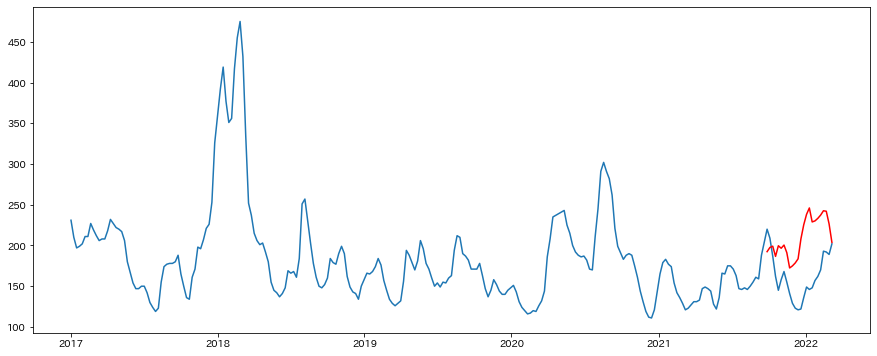

In [16]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
bestPred = result.predict('2021-09-27', '2022-03-07',exog=X_pred,freq="W-MON")
plt.plot(df["キャベツ"])
plt.plot(bestPred, "r")

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["キャベツ"],bestPred)

3325.9877234820865